In [5]:
#%%
"""File optimisation.ipynb

:author: Cloe Cortes Balcells






:date: Mon July 18 10:19:14 2022

This illustrates how to use the multi-objective VNS algorithm using a
multiobjective problem.  There are two objectives: maximize Cobb Douglas
and minimize number of deaths. The number of infections cannot go beyond capacity of the hospitals.

"""
import numpy as np
import biogeme
from biogeme import vns
import biogeme.exceptions as excep
import copy
import biogeme.messaging as msg
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import random
import matplotlib.font_manager as font_manager

logger = msg.bioMessage()
logger.setDebug()

In [6]:
class onesolution(vns.solutionClass):
    """Implements the virtual class. A solution here is a
    configuration.

    """
    def __init__(self, solution):
        super().__init__()
        self.x = solution
        self.objectivesNames = ['Negative Cobb-Douglas', 'Deaths']
        self.objectives = None

    def isDefined(self):
        """Check if the decision variables iarewell defined.

        :return: True if the configuration vector ``x`` is defined,
            and the total deaths and total Cobb-Douglas are both defined.
        :rtype: bool
        """
        if self.x is None:
            return False
        if self.objectives is None:
            return False
        return True

    def __repr__(self):
        return str(self.x)

    def __str__(self):
        return str(self.x)

In [24]:
import pickle
pickleFile = 'results/optimPareto_60days_v4juin_v1_2.pickle'

In [25]:
pareto = vns.paretoClass(_, archiveInputFile=pickleFile)
print(f'Number of pareto solutions: {len(pareto.pareto)}')
print(f'Number of removed solutions: {len(pareto.removed)}')
print(f'Number of considered solutions: {len(pareto.considered)}')

[11:37:32] < General >   Pareto set initialized from file with 14 elements.
Number of pareto solutions: 14
Number of removed solutions: 16
Number of considered solutions: 58


In [50]:
eco_cost = []
sanitary_cost = []
for element in pareto.pareto:
    print(f'x = {element.x} objectives = {element.objectives}')
    eco_cost.append(element.objectives[1])
    sanitary_cost.append(element.objectives[0])
eco_cost = np.array(eco_cost)/1000000
sanitary_cost = np.array(sanitary_cost)/1000000
print("eco",eco_cost.round(2))
print("sanitary",sanitary_cost.round(2))

x = [ 0 60  1  1  1  1  1  1  1  1  1] objectives = [706234.1, 12352770.0]
x = [2, 59, 1, 1, 1, 1, 1, 1, 1, 1, 1] objectives = [707052.5, 11735131.5]
x = [0, 60, 1, 1, 1, 1, 1, 1, 1, 1, 4] objectives = [704520.3, 12600519.6]
x = [1, 60, 1, 1, 1, 1, 1, 1, 1, 1, 1] objectives = [706662.0, 12146890.5]
x = [0, 60, 1, 1, 1, 4, 1, 3, 1, 1, 1] objectives = [189440.9, 103371861.6]
x = [0, 60, 1, 4, 1, 1, 4, 1, 1, 1, 1] objectives = [217067.4, 81219747.6]
x = [0, 58, 1, 1, 4, 1, 1, 4, 1, 1, 1] objectives = [200979.9, 97768580.44]
x = [0, 60, 4, 1, 1, 4, 1, 3, 1, 1, 1] objectives = [161841.9, 103642137.6]
x = [0, 57, 1, 1, 4, 1, 1, 1, 1, 1, 1] objectives = [697015.0, 49439735.46]
x = [2, 59, 1, 1, 1, 1, 4, 1, 1, 1, 1] objectives = [364364.0, 66598445.46]
x = [2, 59, 1, 1, 1, 1, 4, 1, 1, 2, 1] objectives = [462550.0, 66268160.67]
x = [0, 60, 1, 1, 1, 1, 1, 4, 1, 1, 4] objectives = [662483.8, 61698603.6]
x = [0, 60, 1, 1, 1, 1, 1, 1, 1, 4, 1] objectives = [700960.7, 14233880.4]
x = [1, 59, 1, 1, 1

In [45]:
eco_cost = np.array(eco_cost)/1000000
print(eco_cost)

[1.17351315e-05 1.21468905e-05 1.23527700e-05 1.26005196e-05
 1.37594177e-05 1.42338804e-05 4.94397355e-05 6.16986036e-05
 6.62681607e-05 6.65984455e-05 8.12197476e-05 9.77685804e-05
 1.03371862e-04 1.03642138e-04]


In [30]:
#for element in pareto.considered:
#    print(f'x = {element.x} objectives = {element.objectives}')



In [28]:
objectives = list(pareto.pareto)[0].objectivesNames
par_obj = [p.objectives for p in pareto.pareto]

par_x, par_y = zip(*par_obj)
con_obj = [p.objectives for p in pareto.considered]
con_x, con_y = zip(*con_obj)
try:
    rem_obj = [p.objectives for p in pareto.removed]
    rem_x, rem_y = zip(*rem_obj)
except:
    pass
x_buffer = 1
y_buffer = 0.01
val1=1/100
#par_y=np.multiply(par_y,val1)
#rem_y=np.multiply(rem_y,val1)
#con_y=np.multiply(con_y,val1)
#par_x=np.multiply(par_x,val1)
#rem_x=np.multiply(rem_x,val1)
#con_x=np.multiply(con_x,val1)

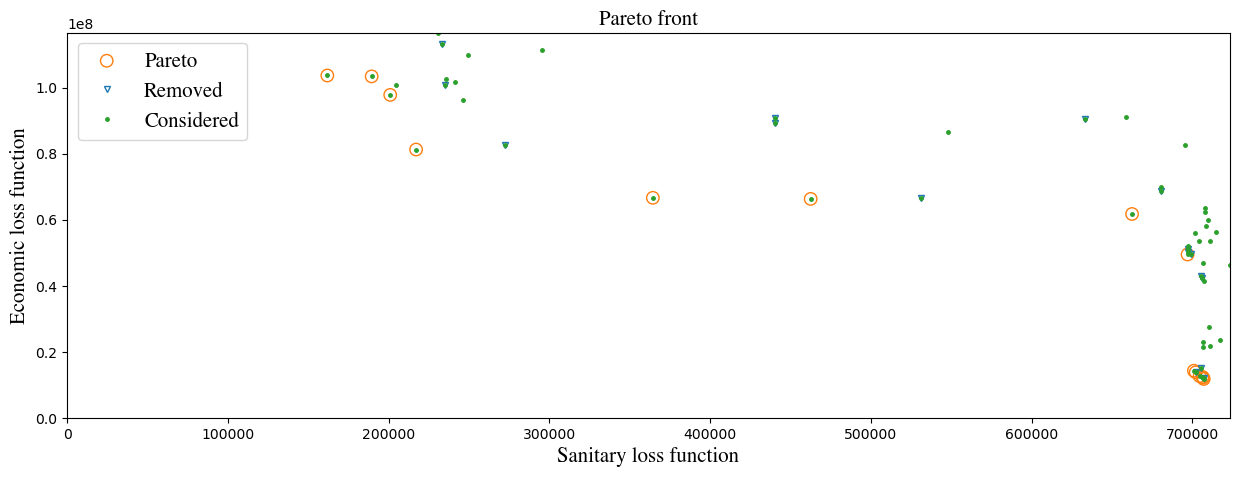

In [29]:
from turtle import color

fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(15)
hfont = {'fontname':'Times'}
font = font_manager.FontProperties(family='Times',
                                weight='bold',
                                style='normal', size=15)


quantile_80_conx=np.quantile(con_x,0.8)
quantile_20_conx=np.quantile(con_x,0.2)
quantile_5_conx=np.quantile(con_x,0.05)
plt.axis([min(con_x) - x_buffer,
          max(con_x) + x_buffer,
          min(con_y) - y_buffer,
          max(con_y) + y_buffer])

ax.set_ylim(ymin=0)
ax.set_xlim(xmin= 0)
plt.scatter(par_x, par_y, s=80, facecolors='none', edgecolors='tab:orange',label='Pareto')
try:
    plt.plot(rem_x, rem_y, 'v', label='Removed',color='tab:blue', markersize=5, markerfacecolor='none')
except:
    pass
plt.plot(con_x,con_y, '.', label='Considered', color='tab:green',markersize=5)
plt.xlabel(objectives[0])
plt.ylabel(objectives[1])
plt.legend(prop=font)
plt.ylabel('Economic loss function', size='15', **hfont)
plt.xlabel('Sanitary loss function', size='15', **hfont)
plt.title('Pareto front', size='15', **hfont)
plt.savefig("PARETO.png", dpi=1200, facecolor="white")

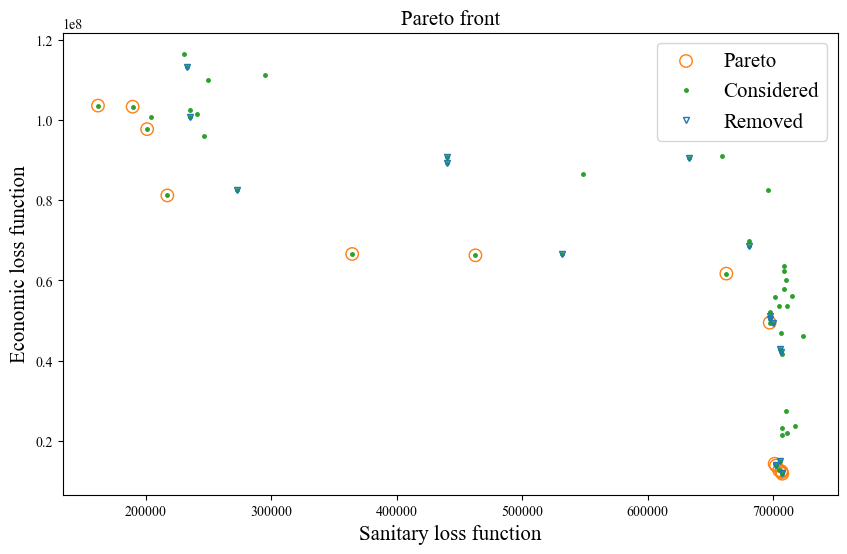

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker


# Set figure size
fig, ax = plt.subplots(figsize=(10, 6))

# Set font properties
font = {'family': 'Times New Roman', 'size': 15}
plt.rcParams['font.family'] = 'Times New Roman'

# Set plot limits and buffer
x_buffer = (max(con_x) - min(con_x)) * 0.05
y_buffer = (max(con_y) - min(con_y)) * 0.05
plt.axis([min(con_x) - x_buffer, max(con_x) + x_buffer, min(con_y) - y_buffer, max(con_y) + y_buffer])

# Plot data points
plt.scatter(par_x, par_y, s=80, facecolors='none', edgecolors='tab:orange', label='Pareto')
plt.plot(con_x, con_y, '.', label='Considered', color='tab:green', markersize=5)
plt.plot(rem_x, rem_y, 'v', label='Removed',color='tab:blue', markersize=5, markerfacecolor='none')

# Set x and y labels
plt.xlabel('Sanitary loss function', **font)
# Change x-axis scale to scientific format
ax.xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax.xaxis.offsetText.set_fontsize(12)
plt.ylabel('Economic loss function', **font)

# Set title
plt.title('Pareto front', **font)

# Set legend
plt.legend(prop=font)

# Save the figure
plt.savefig("PARETO_FRONT.png", dpi=300, bbox_inches='tight', facecolor="white")

# Show the plot
plt.show()
